In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt
import plotly.express as px
import matplotlib as mpl
import seaborn as sns
import warnings
import os 
import folium
from folium.plugins import HeatMap

In [3]:
df = pd.read_csv('crime.csv')

In [4]:
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [5]:
df.drop(['SHOOTING'],axis=1,inplace=True)

In [6]:
year_2015 = df[df['YEAR']==2015]['YEAR'].count()
year_2016 = df[df['YEAR']==2016]['YEAR'].count()
year_2017 = df[df['YEAR']==2017]['YEAR'].count()
year_2018 = df[df['YEAR']==2018]['YEAR'].count()
All_year = df['YEAR'].count()
All_year

319073

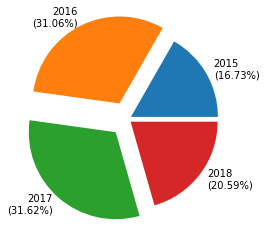

In [7]:
plt.pie([year_2015, year_2016,year_2017,year_2018], 
        labels=[f'2015\n({round((year_2015/All_year)*100, 2)}%)',
                f'2016\n({round((year_2016/All_year)*100, 2)}%)',
                f'2017\n({round((year_2017/All_year)*100, 2)}%)',
                f'2018\n({round((year_2018/All_year)*100, 2)}%)'] , explode = (0.05, 0.2, 0.2,0.05))

plt.show()


In [8]:
Jan=df[df['MONTH']==1]['MONTH'].count()
Feb=df[df['MONTH']==2]['MONTH'].count()
Mar=df[df['MONTH']==3]['MONTH'].count()
Apr=df[df['MONTH']==4]['MONTH'].count()
May=df[df['MONTH']==5]['MONTH'].count()
Jun=df[df['MONTH']==6]['MONTH'].count()
Jul=df[df['MONTH']==7]['MONTH'].count()
Aug=df[df['MONTH']==8]['MONTH'].count()
Sep=df[df['MONTH']==9]['MONTH'].count()
Okt=df[df['MONTH']==10]['MONTH'].count()
Nov=df[df['MONTH']==11]['MONTH'].count()
Dec=df[df['MONTH']==12]['MONTH'].count()
All_month =df['MONTH'].count()


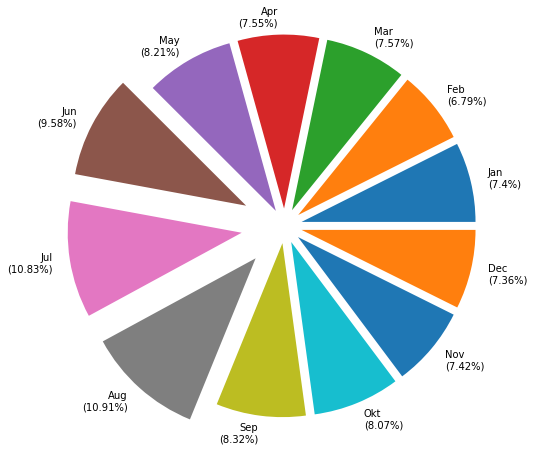

In [9]:
plt.pie([Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Dec], 
        labels=[f'Jan\n({round((Jan/All_month)*100, 2)}%)',
                f'Feb\n({round((Feb/All_month)*100, 2)}%)',
                f'Mar\n({round((Mar/All_month)*100, 2)}%)',
                f'Apr\n({round((Apr/All_month)*100, 2)}%)',
                f'May\n({round((May/All_month)*100, 2)}%)',
                f'Jun\n({round((Jun/All_month)*100, 2)}%)',
                f'Jul\n({round((Jul/All_month)*100, 2)}%)',
                f'Aug\n({round((Aug/All_month)*100, 2)}%)',
                f'Sep\n({round((Sep/All_month)*100, 2)}%)',
                f'Okt\n({round((Okt/All_month)*100, 2)}%)',
                f'Nov\n({round((Nov/All_month)*100, 2)}%)',
                f'Dec\n({round((Dec/All_month)*100, 2)}%)'] , explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.2, 0.2,0.2,0.2),radius=2)

plt.show()

In [10]:
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


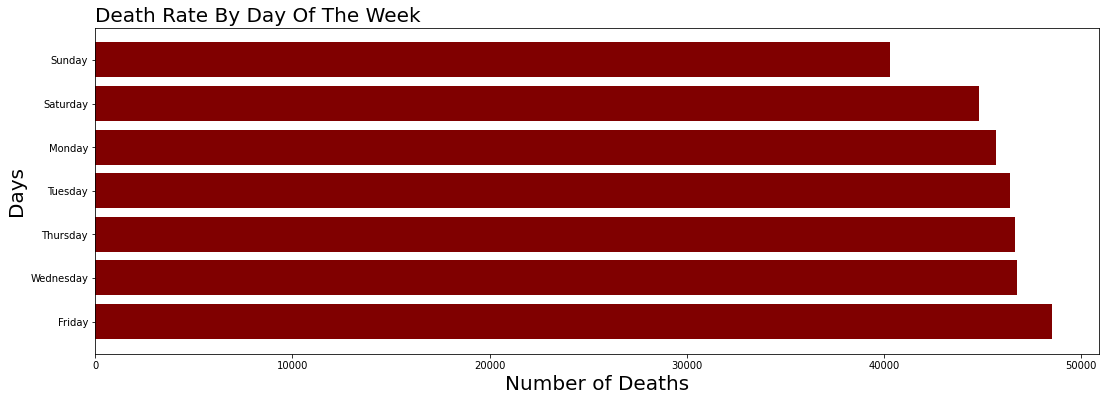

In [11]:
Friday = 48495
Wednesday = 46729
Thursday = 46656
Tuesday = 46383
Monday = 45679
Saturday = 44818
Sunday = 40313

data ={'Friday': 48495,'Wednesday':46729,'Thursday':46656,'Tuesday':46383,'Monday':45679,'Saturday':44818,'Sunday':40313}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize=(18, 6))
plt.barh(courses, values, color='maroon')
plt.xlabel("Number of Deaths",size=20)
plt.ylabel("Days",size=20)
plt.title("Death Rate By Day Of The Week",loc='left',size=20)

plt.show()

In [12]:
Morning=df[(df['HOUR']>=5) & (df['HOUR']<=12)]['HOUR'].count()
Afternoon =df[(df['HOUR']>=12) & (df['HOUR']<=17)]['HOUR'].count()
Evening =df[(df['HOUR']>=17) & (df['HOUR']<=21)]['HOUR'].count()
Night = df[(df['HOUR']>21) | (df['HOUR']<5)]['HOUR'].count()
All_day = df['HOUR'].count()
Night



63587

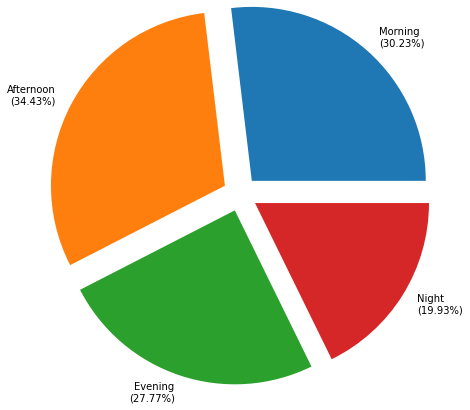

In [13]:
plt.pie([Morning,Afternoon,Evening,Night], labels=[f'Morning\n({round((Morning/All_day)*100, 2)}%)',
                                                   f'Afternoon\n({round((Afternoon/All_day)*100, 2)}%)',
                                                   f'Evening\n({round((Evening/All_day)*100, 2)}%)',
                                                   f'Night\n({round((Night/All_day)*100, 2)}%)'],explode = (0.2, 0.2, 0.2, 0.2),radius=2)
plt.show()
                                                   

In [14]:
df_geo = gpd.GeoDataFrame(df,geometry= gpd.points_from_xy(df['Long'],df['Lat']))

C:\Users\AKBAR\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [15]:
df_geo

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,geometry
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",POINT (-71.13937 42.35779)
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",POINT (-71.06030 42.30682)
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",POINT (-71.07243 42.34659)
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",POINT (-71.07866 42.33418)
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",POINT (-71.09036 42.27537)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",POINT (-71.08575 42.33695)
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",POINT (-71.12317 42.25593)
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",POINT (-71.12317 42.25593)
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",POINT (-71.11156 42.30233)


C:\Users\AKBAR\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\AKBAR\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\AKBAR\AppData\Local\Programs\Python\Python39\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\AKBAR\AppData\Local\Programs\Python\Python39\lib\site-packages\descartes\patch.p

<AxesSubplot:>

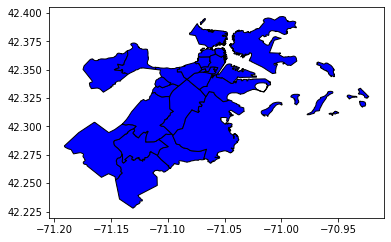

In [16]:
Boston_map=gpd.read_file(r'Boston_Neighborhoods.shp')
Boston_map.plot(color='blue',edgecolor='black')


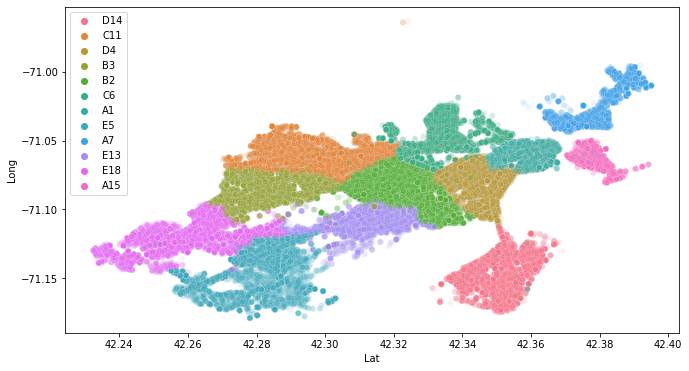

In [17]:
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)

mpl.rcParams["figure.figsize"] = 21,11

plt.subplots(figsize=(11,6))
sns.scatterplot(x='Lat',
                y='Long',
                hue='DISTRICT',
                alpha=0.1,
                data=df)
plt.legend(loc=2)

In [23]:
ballistic_crimes=df.loc[df.OFFENSE_CODE_GROUP=='Ballistics'][['Lat','Long']]
ballistic_crimes.Lat.fillna(0, inplace = True)
ballistic_crimes.Long.fillna(0, inplace = True) 

map_1=folium.Map(location=[42.356145,-71.064083], 
                 tiles = "Stamen Toner",
                zoom_start=11)

folium.CircleMarker([42.307945,-71.069989],
                        radius=90,
                        fill_color="#b22222",
                        popup='Homicide',
                        color='red',
                       ).add_to(map_1)


HeatMap(data=ballistic_crimes, radius=16).add_to(map_1)
map_1

In [24]:
df['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Burglary - No Property Taken                     2
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [26]:
Biological_Threat=df.loc[df.OFFENSE_CODE_GROUP=='Biological Threat'][['Lat','Long']]
Biological_Threat.Lat.fillna(0, inplace = True)
Biological_Threat.Long.fillna(0, inplace = True) 

map_1=folium.Map(location=[42.356145,-71.064083], 
                 tiles = "Stamen Toner",
                zoom_start=11)

folium.CircleMarker([42.307945,-71.069989],
                        radius=90,
                        fill_color="#b22222",
                        popup='Homicide',
                        color='red',
                       ).add_to(map_1)


HeatMap(data=Biological_Threat, radius=16).add_to(map_1)
map_1

In [27]:
HUMAN_TRAFFICKING=df.loc[df.OFFENSE_CODE_GROUP=='HUMAN TRAFFICKING'][['Lat','Long']]
HUMAN_TRAFFICKING.Lat.fillna(0, inplace = True)
HUMAN_TRAFFICKING.Long.fillna(0, inplace = True) 

map_1=folium.Map(location=[42.356145,-71.064083], 
                 tiles = "Stamen Toner",
                zoom_start=11)

folium.CircleMarker([42.307945,-71.069989],
                        radius=90,
                        fill_color="#b22222",
                        popup='Homicide',
                        color='red',
                       ).add_to(map_1)


HeatMap(data=HUMAN_TRAFFICKING, radius=16).add_to(map_1)
map_1